In [1]:
spark.version

'3.1.3'

In [2]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [4]:
directory = 'gs://msca-bdp-tweets/final_project'
file = '/*.json'
path = directory + file
# path = directory

In [ ]:
%%time
tweets_df = spark.read.json(path)

In [6]:
data = tweets_df.select([tweets_df.text,
                         tweets_df.coordinates.coordinates.alias('coordinates')])

In [7]:
import pyspark.sql.functions as f

In [ ]:
data = data.withColumn("text",f.lower(f.col("text")))

In [8]:
education_data = data.filter((data.text.contains("education"))\
                          | (data.text.contains("university"))\
                          | (data.text.contains("school"))\
                          | (data.text.contains("degree"))\
                          | (data.text.contains("book"))\
                          | (data.text.contains("public school"))\
                          | (data.text.contains("higher education"))\
                          | (data.text.contains("science"))\
                          | (data.text.contains("math"))
                          | (data.text.contains("online learning"))\
                          | (data.text.contains("Secondary education"))\
                          | (data.text.contains("k12"))\
                          | (data.text.contains("curriculum"))\
                          | (data.text.contains("stem"))\
                          | (data.text.contains("textbook"))\
                          | (data.text.contains("science of learning"))\
                          | (data.text.contains("online learning"))\
                          | (data.text.contains("ai-driven learning"))\
                          | (data.text.contains("education trends"))\
                          | (data.text.contains("education platforms"))\
                          | (data.text.contains("homeschooling"))\
                          | (data.text.contains("hybrid-learning"))\
                          | (data.text.contains("k-12 cybersecurity"))\
                          | (data.text.contains("asynchronous learning"))\
                          | (data.text.contains("augmented & virtual reality in the classroom"))\
                          | (data.text.contains("social-emotional learning"))\
                          | (data.text.contains("game-based learning")))


In [9]:
import geopandas 
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [17]:
coordinates = education_data.select('coordinates').dropna()

In [18]:
coordinates = coordinates.toPandas()

In [19]:
coordinates['coordinates'] = [tuple(lst) for lst in coordinates.coordinates]

In [22]:
coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [23]:
gdf = geopandas.GeoDataFrame(coordinates, geometry='coordinates')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/miniconda3/share/proj failed


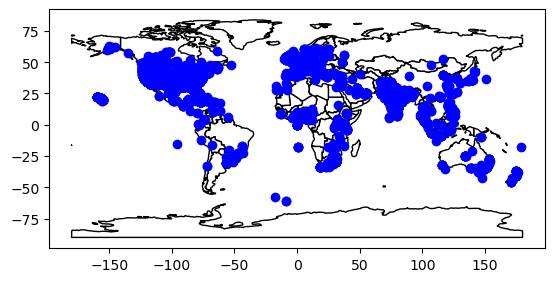

In [24]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='blue')

plt.show()

In [10]:
country_data = tweets_df.select([tweets_df.created_at,
                         tweets_df.place.country.alias("country"),
                         tweets_df.id,
                        tweets_df.text])

In [11]:
country_map = country_data.groupby('country').count().orderBy('count', ascending = False)

In [ ]:
country_map.na.drop(subset=["country"])

In [18]:
top5countries = country_map

In [19]:
top5countries = top5countries.limit(6).toPandas()

In [21]:
top5countries = top5countries.drop(index=0)

In [23]:
top5countries

,country,count
1,United States,549531
2,United Kingdom,73096
3,India,46373
4,Kingdom of Saudi Arabia,28523
5,Canada,25197


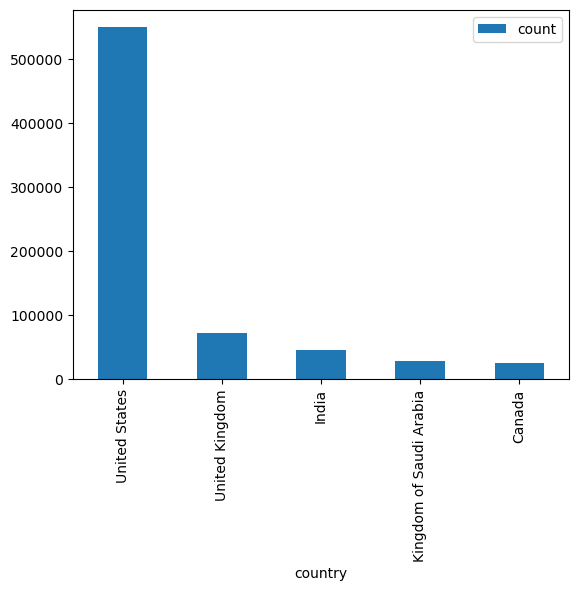

In [22]:
top5countries.plot(kind='bar', x='country', y='count')
plt.show()